In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs = 1000
sim_times = np.arange(0, 10, 1/fs)
dt = np.mean(np.diff(sim_times))

# PRBS

In [3]:
def prbs(n, pattern=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]):
    """
    Generates a PRBS signal of length n with the given pattern.

    Args:
    n (int): Length of the PRBS signal to generate.
    pattern (list[int]): List representing the initial pattern for the PRBS signal. Default is [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

    Returns:
    numpy.ndarray: PRBS signal of length n.
    """
    m = len(pattern)
    # Initialize the output signal
    signal = np.zeros(n)
    # Initialize the shift register
    sr = np.array(pattern)
    # Generate the PRBS signal
    for i in range(n):
        # XOR the bits at positions 0 and m-1
        xor_result = sr[0] ^ sr[m-1]
        # Shift the register and put the XOR result at position 0
        sr[1:] = sr[:-1]
        sr[0] = xor_result
        # Add the new bit to the output signal
        signal[i] = xor_result
        
    return signal

In [4]:
prbs_signal = prbs(len(sim_times))

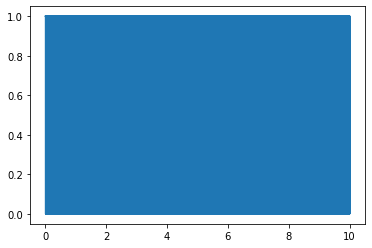

In [5]:
plt.plot(sim_times, prbs_signal)
plt.show()

# Step function

In [22]:
U_step = np.zeros((len(sim_times), 2))

e1 = np.random.normal(0, .01, U_step.shape[0])
e2 = np.random.normal(0, .01, U_step.shape[0])

U_step[:,0] += 2.5 + e1
U_step[:,1] += e2
U_step[3800:,1] += 1.5

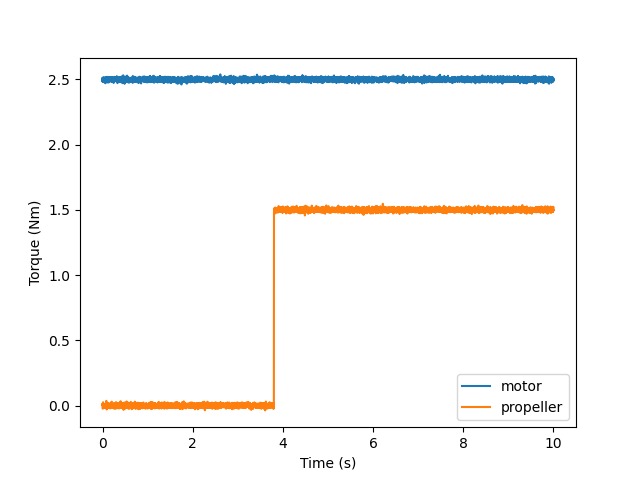

In [24]:
plt.figure()
plt.plot(sim_times, U_step, label=('motor', 'propeller'))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.show()

# Load reversal

In [6]:
def reversal(start, end, n):
    """
    Generates a step signal with an initial value of `start` and an end value of `end`.

    Args:
    start (float): Initial value of the step signal.
    end (float): End value of the step signal.
    n (int): Length of the step signal to generate.

    Returns:
    numpy.ndarray: Step signal of length n.
    """
    # Initialize the output signal
    signal = np.zeros(n)
    # Set the initial value
    signal[0] = start
    # Calculate the step size
    step = (end - start) / (n - 1)
    # Generate the step signal
    for i in range(1, n):
        signal[i] = signal[i-1] + step
        
    return signal

In [9]:
reversal_signal = reversal(200, -200, len(sim_times))

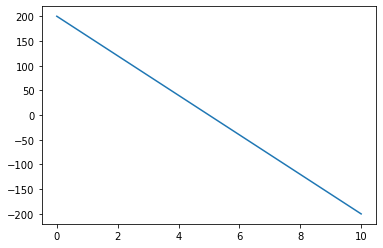

In [10]:
plt.plot(sim_times, reversal_signal)
plt.show()

# Sinusoidal (rot speed x prop blades)

In [16]:
def sum_sines(freqs, amps, phases, times, dc_offset):
    """
    Generates a sinusoidal signal that is a sum of three sine waves with different frequencies.

    Args:
    freqs (list[float]): List of three frequencies for the sine waves.
    amps (list[float]): List of three amplitudes for the sine waves.
    phases (list[float]): List of three phase shifts for the sine waves.
    times (numpy.ndarray): Timesteps of the signal in seconds.

    Returns:
    numpy.ndarray: Sinusoidal signal that is a sum of three sine waves.
    """
    
    signal = np.zeros(len(times))
    for f, a, p in zip(freqs, amps, phases):
        signal += a * np.sin(2 * np.pi * f * times + p)
        
    return signal + dc_offset

In [17]:
freqs = [20, 40, 60]
amps = [2, 1, 0.5]
phases = [0, 0, 0]
offset = 200
sine_signal = sum_sines(freqs, amps, phases, sim_times, offset)

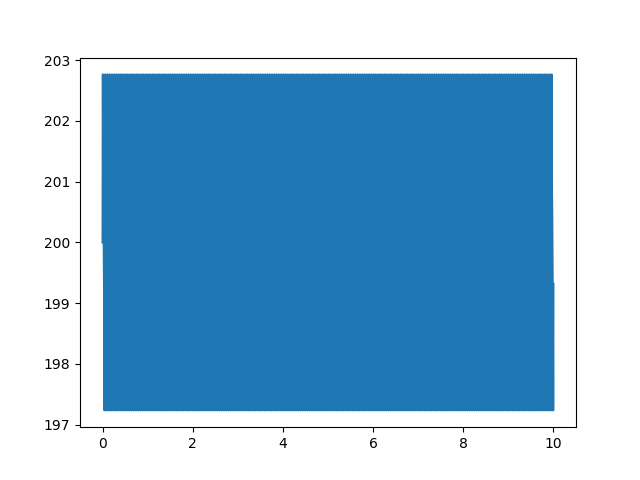

In [19]:
%matplotlib widget
plt.figure()
plt.plot(sim_times, sine_signal)
plt.show()

# Ice load

In [ ]:
times = np.genfromtxt("../data/ice_excitation/times.csv", delimiter=",")
speeds = np.genfromtxt("../data/ice_excitation/speeds.csv", delimiter=",", usecols=(6,7,13,14,21))
meas_speeds = np.genfromtxt("../data/ice_excitation/speed_measurements.csv", delimiter=",")
torques = np.genfromtxt("../data/ice_excitation/torques.csv", delimiter=",", usecols=(8,18))
meas_torques = np.genfromtxt("../data/ice_excitation/torque_measurements.csv", delimiter=",")
motor = np.genfromtxt("../data/ice_excitation/motor.csv", delimiter=",")
propeller = np.genfromtxt("../data/ice_excitation/propeller.csv", delimiter=",")

# CFD

In [ ]:
sensor_data = np.genfromtxt("../data/constant_speed_torque_CFD/CFD1.csv", delimiter=",")
motor_data = np.genfromtxt("../data/constant_speed_torque_CFD/CFD1_motor.csv", delimiter=",")